Importamos librerías a utilizar

In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Generamos DataFrames con los excels dados

In [ ]:
""" 
Del excel Internet vamos a revisar unicamente las hojas necesarias
"""
archivo = "Internet.xlsx"
hojas_necesarias = [ "Dial-BAf", "Totales Accesos Por Tecnología", "Accesos Por Tecnología", "Penetracion-hogares"]  
dfs = pd.read_excel(archivo, sheet_name=hojas_necesarias)
DB = dfs["Dial-BAf"]
TAT = dfs["Totales Accesos Por Tecnología"]
PH = dfs["Penetracion-hogares"]
AXT=dfs["Accesos Por Tecnología"]
print(DB.head())
print(TAT.head())
print(AXT.head())
print(PH.head())

    Año  Trimestre        Provincia  Banda ancha fija  Dial up    Total
0  2024          2     Buenos Aires           4983480   5900.0  4989380
1  2024          2  Capital Federal           1461549   2050.0  1463599
2  2024          2        Catamarca             75073      1.0    75074
3  2024          2            Chaco            147087      5.0   147092
4  2024          2           Chubut            173366    857.0   174223
    Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2024          2   733491     5867504       4169958    593197  191957   
1  2024          1   774475     5986957       4015101    598682  257941   
2  2023          4   836390     6022532       3908183    585760  194796   
3  2023          3   897895     6018832       3708718    581436  200027   
4  2023          2  1006509     5997149       3463988    581823  202428   

      Total        Periodo  
0  11556107   Abr-Jun 2024  
1  11633156   Ene-Mar 2024  
2  11547661   Oct-Dic 2023  
3

Identificamos tipos de datos y estructuras

In [63]:
print(DB.info())
print(TAT.info())
print(AXT.info())
print(PH.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1992 non-null   int64  
 1   Trimestre         1992 non-null   int64  
 2   Provincia         1992 non-null   object 
 3   Banda ancha fija  1992 non-null   int64  
 4   Dial up           1988 non-null   float64
 5   Total             1992 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros  

Revisamos valores faltantes

In [64]:
print(TAT.isnull().sum())
print(DB.isnull().sum())

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64
Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             4
Total               0
dtype: int64


Vemos que Dial up contiene valores nulos, pero no es una columna con la cuál vayamos a trabajar, simplemente la ignoramos. 

In [65]:
print(AXT.isnull().sum())
print(PH.isnull().sum())

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64
Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64


Revisando Accesos por tecnología, en la página aparece un escrito al final, por eso marca valores nulos, ahora los voy a eliminar

In [76]:
AXT = AXT.dropna()


Revisamos valores duplicados

In [80]:
print(f"Duplicados: {TAT.duplicated().sum()}")
print(f"Duplicados: {PH.duplicated().sum()}")
print(f"Duplicados: {DB.duplicated().sum()}")
print(f"Duplicados: {AXT.duplicated().sum()}")

Duplicados: 0
Duplicados: 0
Duplicados: 0
Duplicados: 0


Examinamos Dial-BA

In [78]:
duplicados_db = DB[DB.duplicated()]
print(duplicados_db)

       Año  Trimestre            Provincia  Banda ancha fija  Dial up    Total
1008  2024          1         Buenos Aires           5038657   5900.0  5044557
1009  2024          1      Capital Federal           1502661   2050.0  1504711
1010  2024          1            Catamarca             74932      1.0    74933
1011  2024          1                Chaco            155538      5.0   155543
1012  2024          1               Chubut            169819    857.0   170676
...    ...        ...                  ...               ...      ...      ...
1987  2014          1           Santa Cruz             26304    460.0    26764
1988  2014          1             Santa Fe            506000    612.0   506612
1989  2014          1  Santiago Del Estero             37124      9.0    37133
1990  2014          1     Tierra Del Fuego             27272    766.0    28038
1991  2014          1              Tucumán            129944     88.0   130032

[984 rows x 6 columns]


Vemos que lo sucedido es que se leyó 2 veces, por lo cuál vamos a eliminar los duplicados

In [79]:
DB = DB.drop_duplicates()
DB

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2024,2,Buenos Aires,4983480,5900.0,4989380
1,2024,2,Capital Federal,1461549,2050.0,1463599
2,2024,2,Catamarca,75073,1.0,75074
3,2024,2,Chaco,147087,5.0,147092
4,2024,2,Chubut,173366,857.0,174223
...,...,...,...,...,...,...
1003,2014,1,Santa Cruz,26304,460.0,26764
1004,2014,1,Santa Fe,506000,612.0,506612
1005,2014,1,Santiago Del Estero,37124,9.0,37133
1006,2014,1,Tierra Del Fuego,27272,766.0,28038


Ahora si!

In [82]:
print(TAT.describe())
print(AXT.describe())

               Año  Trimestre          ADSL    Cablemodem  Fibra óptica  \
count    42.000000  42.000000  4.200000e+01  4.200000e+01  4.200000e+01   
mean   2018.761905   2.452381  2.694844e+06  4.433906e+06  1.224694e+06   
std       3.074756   1.130560  1.094347e+06  1.319783e+06  1.321136e+06   
min    2014.000000   1.000000  7.334910e+05  2.407330e+06  1.391870e+05   
25%    2016.000000   1.250000  1.730869e+06  3.146292e+06  1.719410e+05   
50%    2019.000000   2.000000  3.061623e+06  4.535507e+06  6.989465e+05   
75%    2021.000000   3.000000  3.713298e+06  5.857192e+06  1.945689e+06   
max    2024.000000   4.000000  3.803024e+06  6.073426e+06  4.169958e+06   

            Wireless          Otros         Total  
count      42.000000      42.000000  4.200000e+01  
mean   304293.214286  158186.071429  8.815923e+06  
std    203202.399993   82363.507846  1.733189e+06  
min     70749.000000   54300.000000  6.398398e+06  
25%     85390.500000   70430.000000  7.218131e+06  
50%    29222

In [83]:
print(DB.describe())
print(PH.describe())

               Año    Trimestre  Banda ancha fija       Dial up         Total
count  1008.000000  1008.000000      1.008000e+03   1006.000000  1.008000e+03
mean   2018.761905     2.452381      3.664347e+05    897.204771  3.673301e+05
std       3.039439     1.117574      7.890852e+05   2272.893571  7.907987e+05
min    2014.000000     1.000000      1.219300e+04      0.000000  1.255700e+04
25%    2016.000000     1.000000      6.187600e+04      5.000000  6.241825e+04
50%    2019.000000     2.000000      1.129880e+05    135.000000  1.139335e+05
75%    2021.000000     3.000000      1.961570e+05    615.000000  1.961585e+05
max    2024.000000     4.000000      5.038657e+06  15229.000000  5.044557e+06
               Año    Trimestre  Accesos por cada 100 hogares
count  1000.000000  1000.000000                   1000.000000
mean   2018.800000     2.464000                     52.794973
std       3.021445     1.114426                     24.135063
min    2014.000000     1.000000                   

Por ahora no sabemos bien que realizar con estos datos, pero seguramente nos van a servir más tarde. Ahora vamos a revisar valores atipicos u outliers, para eso vamos a usar la función de Boxplot

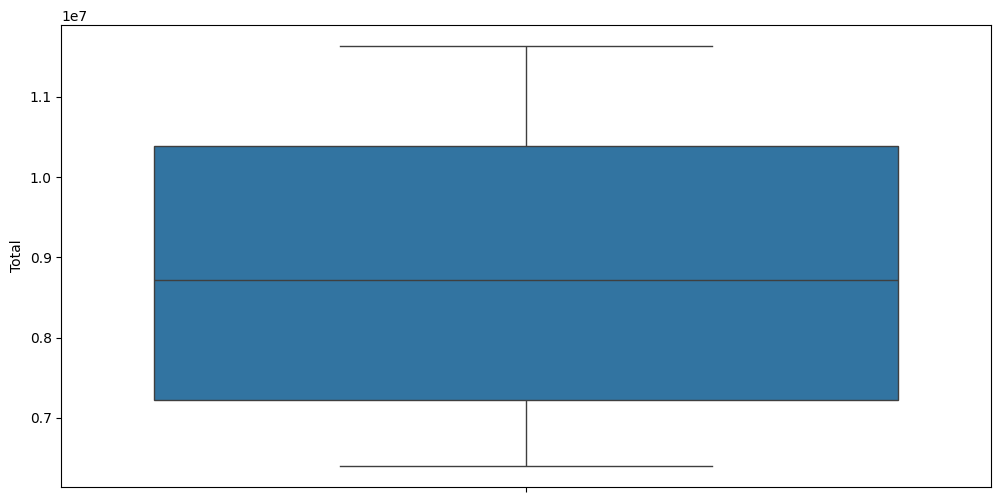

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=TAT["Total"])
plt.xticks(rotation=45)
plt.show()

No hay outliers. En los demás los datos de CABA u otras provincias resaltan demasiado por la diferencia entre accesos que hay, por lo cual no sería una buena idea hacer este tipo de gráficos con esos datos

Ahora vamos a revisar que porcentaje representa cada provincia en cantidad de accesos de Banda Ancha y Dial Up a comparación del país

In [ ]:
""" 
Vamos a crear un df solamente con los datos del último trimestre y las columnas de Provincia y Total
"""
DUT = DB.head(24)
DUT.drop(columns=["Año", "Trimestre", "Banda ancha fija", "Dial up"], inplace=True)
DUT

C:\Users\JuanPablo\AppData\Local\Temp\ipykernel_8028\2902851471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DUT.drop(columns=["Año", "Trimestre", "Banda ancha fija", "Dial up"], inplace=True)


,Provincia,Total
0,Buenos Aires,4989380
1,Capital Federal,1463599
2,Catamarca,75074
3,Chaco,147092
4,Chubut,174223
5,Córdoba,1085774
6,Corrientes,156475
7,Entre Ríos,294311
8,Formosa,62950
9,Jujuy,119684


In [22]:
DUT["Porcentaje"] = (DUT["Total"]/DUT["Total"].sum())*100
DUT

C:\Users\JuanPablo\AppData\Local\Temp\ipykernel_8028\280391292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DUT["Porcentaje"] = (DUT["Total"]/DUT["Total"].sum())*100


,Provincia,Total,Porcentaje
0,Buenos Aires,4989380,43.175267
1,Capital Federal,1463599,12.665156
2,Catamarca,75074,0.649648
3,Chaco,147092,1.272851
4,Chubut,174223,1.507627
5,Córdoba,1085774,9.395673
6,Corrientes,156475,1.354046
7,Entre Ríos,294311,2.546801
8,Formosa,62950,0.544734
9,Jujuy,119684,1.035677


Como podemos ver, las provincias donde llevamos la delantera como empresa en lo que cobertura se refiere (Catamarca, Córdoba, Corrientes, Entre Ríos, La Rioja, San Juan, San Luis, Santa Fe, Santiago y Tierra del fuego) no representan el gran porcentaje de clientes como si lo representa en especial Buenos Aires (más de la mitad) por lo cuál se puede ver una gran oportunidad de mercado en esta zona, dominada particularmente por Movistar y Personal. Fuente: https://www.redusers.com/noticias/que-operador-de-telefonia-celular-tiene-mejor-cobertura-en-cada-provincia/#:~:text=Utilizando%20estos%20datos%2C%20fuimos%20a,75%20por%20ciento%20en%20promedio.

Ahora vamos a ver la distribución del uso de las diferentes tecnologías analizando la columna "Totales Accesos por Tecnología"

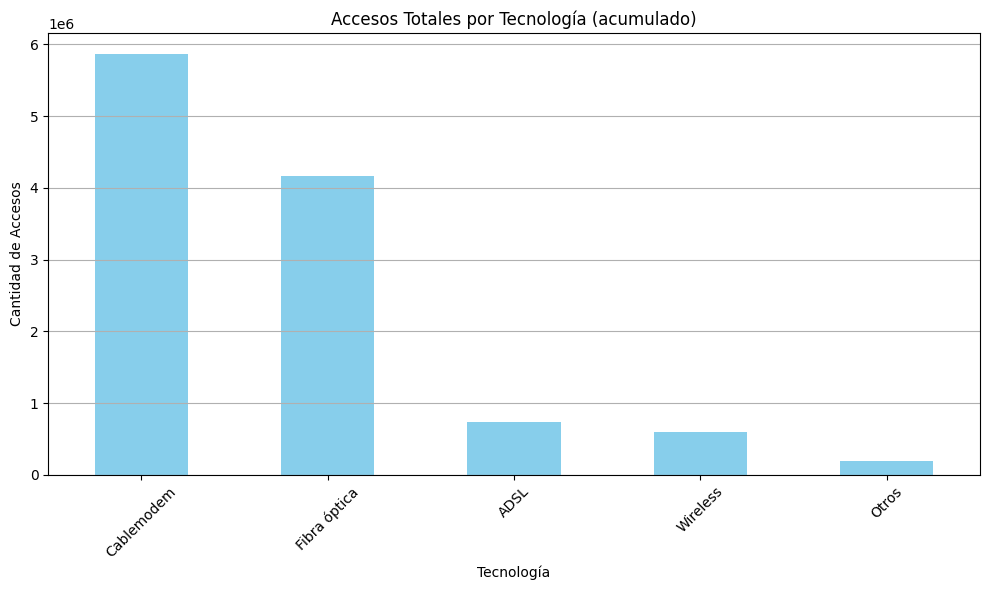

In [22]:
"""
Vamos a usar solamente los datos del último trimestre
"""
TAT0= TAT.head(1)
columnas_tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
totales_por_tecnologia = TAT0[columnas_tecnologias].sum().sort_values(ascending=False)
"""
Graficamos
"""
plt.figure(figsize=(10, 6))
totales_por_tecnologia.plot(kind='bar', color='skyblue')

plt.title('Accesos Totales por Tecnología (acumulado)')
plt.ylabel('Cantidad de Accesos')
plt.xlabel('Tecnología')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Podemos ver que hay una clara preferencia por Cablemodem y Fibra óptica en el último trimestre registrado, pero siempre fue así?

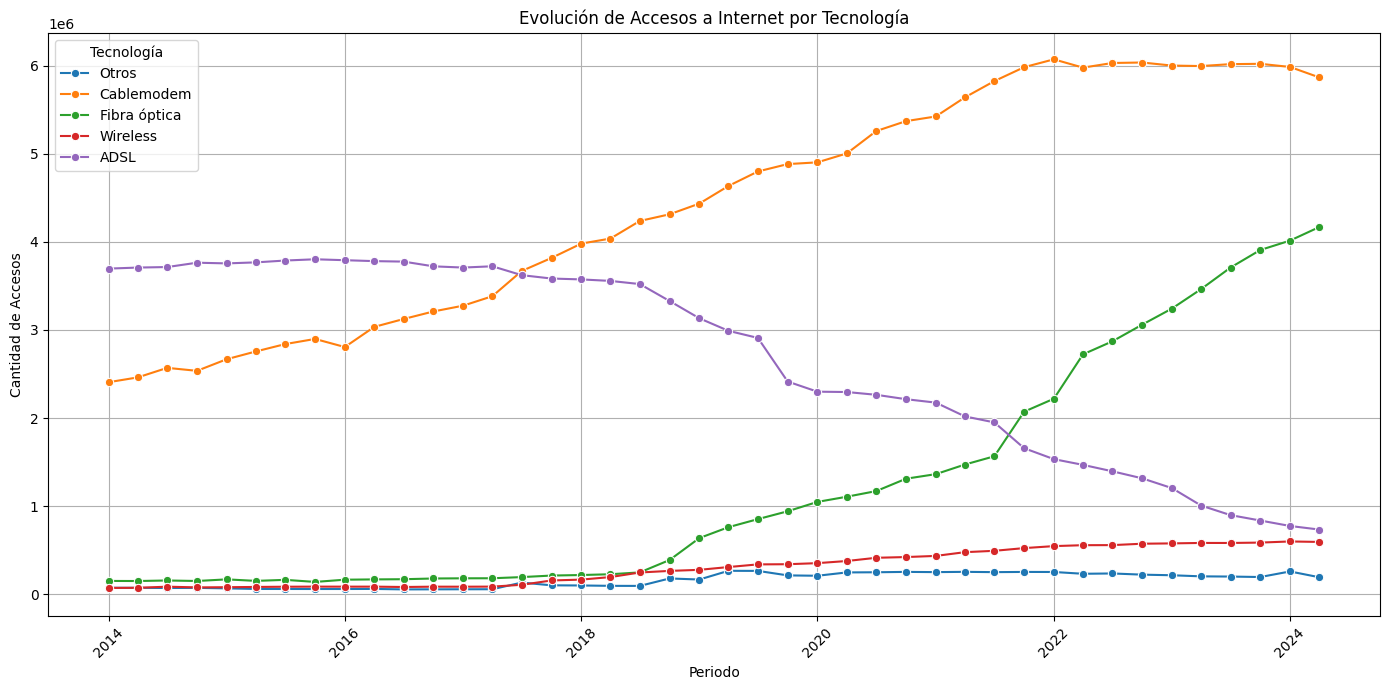

In [ ]:
"""
Este grafico nos va a mostrar como fueron evolucionando las tecnologias a través del tiempo. Tecnologias nos va a servir para separar estas columnas del datafram, 
para luego organizarlos con la función .melt donde pasaríamos a tener una columna "Tecnología" con el nombre de la tecnología, y otra con los Accesos. 
Por otro lado vamos a usar un diccionario para convertir a valor numerico los trimestres guíandonos con los meses de inicio de cada trimestre
"""
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_melt = TAT.melt(id_vars=['Periodo'], value_vars=tecnologias, 
                   var_name='Tecnología', value_name='Accesos')
periodo = {
    'Ene-Mar': '01',
    'Abr-Jun': '04',
    'Jul-Sept': '07',
    'Oct-Dic': '10'
}
"""
Extraemos año y trimestre con las siguientes expresiones:
"""
df_melt['Año'] = df_melt['Periodo'].str.extract(r'(\d{4})')
df_melt['Trimestre'] = df_melt['Periodo'].str.extract(r'([A-Za-z\-]+)')
"""
Creamos una nueva columna "FechaOrden" con los datos de "Año" y trimestre siendo reemplazado por periodo 
"""
df_melt['FechaOrden'] = pd.to_datetime(df_melt['Año'] + '-' + df_melt['Trimestre'].map(periodo) + '-01')
"""
Ordenamos las fechas
"""
df_melt = df_melt.sort_values(by='FechaOrden')
"""
Graficamos
"""
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melt, x='FechaOrden', y='Accesos', hue='Tecnología', marker='o')

plt.title('Evolución de Accesos a Internet por Tecnología')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de Accesos')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Tecnología')
plt.tight_layout()
plt.show()


En este gráfico se puede ver como viene habiendo un cambio de tendencia en los últimos años donde ADSL(Telefonia Fija) viene en caída mientras que Cablemodem tuvo un gran creciciento y parece haber alcanzado un techo, y Fibra óptica sigue creciendo. La escala está en millones de accesos

Ahora vamos a revisar la distribución de la penetración por Provincia a lo largo del tiempo

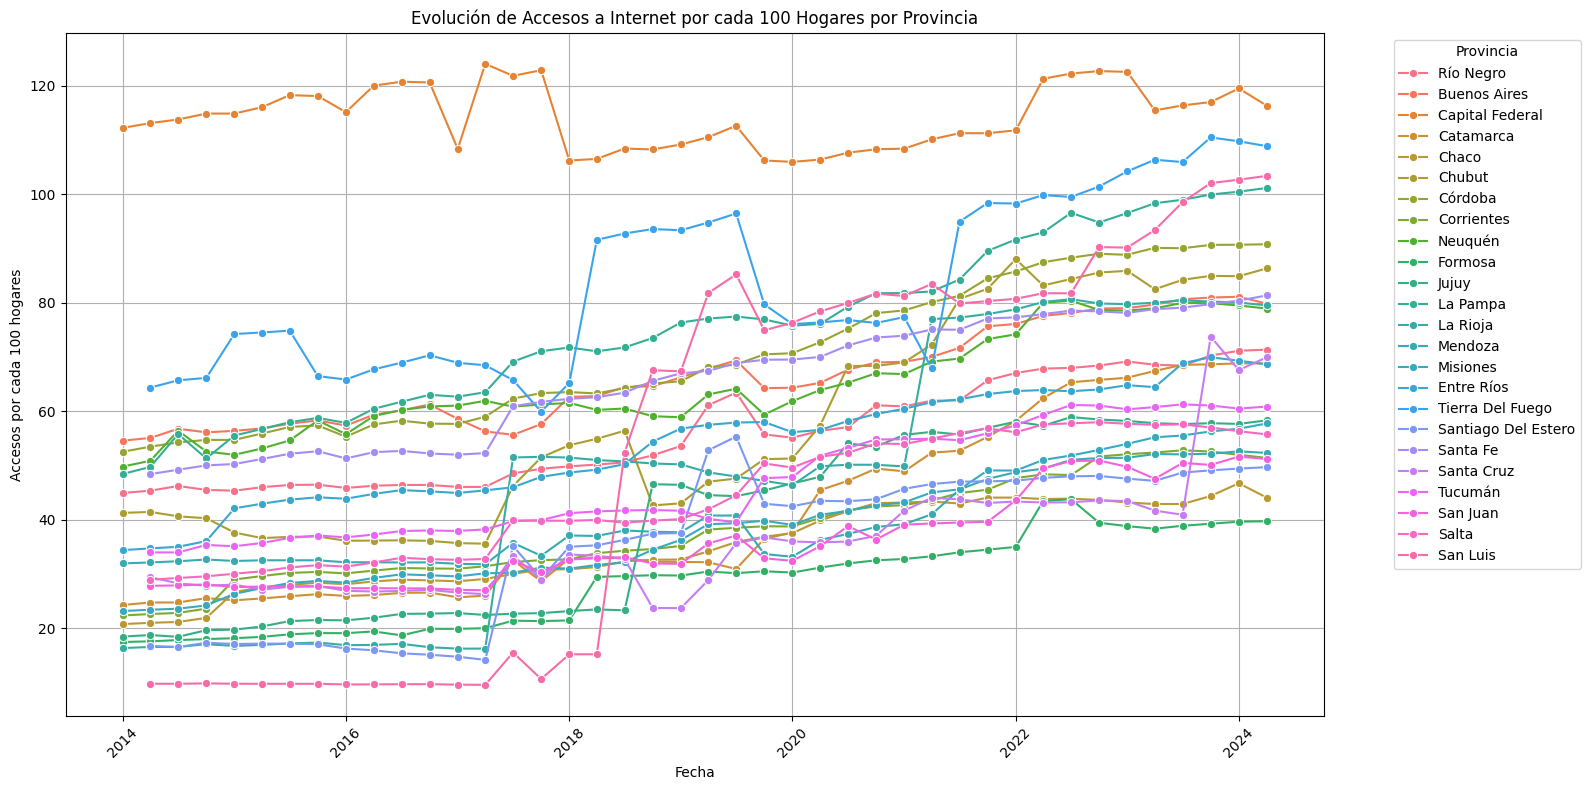

In [ ]:
"""
Volvemos a hacer un diccionario con el periodo
"""
periodo = {
    1: '01',
    2: '04',
    3: '07',
    4: '10'
}

"""Volvemos a crear y ordenar una columna de fechas"""

PH['FechaOrden'] = pd.to_datetime(
    PH['Año'].astype(str) + '-' + PH['Trimestre'].map(periodo) + '-01',
    errors='coerce'
)
df = PH.sort_values('FechaOrden')

"""Graficamos"""

plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x='FechaOrden', y='Accesos por cada 100 hogares', hue='Provincia', marker='o')

plt.title('Evolución de Accesos a Internet por cada 100 Hogares por Provincia')
plt.xlabel('Fecha')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=45)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


Por lo que podemos ver en este gráfico hay una tendencia de crecimiento en varias provincias, exceptuando la Capital Federal que tiene un valor similar al de hace 10 años

# Conclusión

A partir del análisis realizado, se sugiere enfocar las inversiones geográficamente en provincias menos saturadas que Capital Federal, ya que los accesos en esta última parecen haber alcanzado un punto de madurez y difícilmente continúen creciendo al mismo ritmo.

En cuanto a las tecnologías, la Fibra Óptica se destaca como la opción con mayor proyección de crecimiento, lo que indica que debería ser el eje central de la estrategia de despliegue.

También se observó que el AMBA concentra cerca de la mitad de los accesos de banda ancha del país, siendo una zona clave en la que nuestra compañía, Claro, aún no lidera en términos de cobertura. Por ello, mejorar la oferta competitiva en esta región podría representar una oportunidad importante.

Por último, es relevante destacar el peso de la telefonía móvil, que según el informe de “Indicadores de Mercado” del ENACOM (tercer trimestre de 2024), representó el 48 % de la facturación total del sector de telecomunicaciones, lo que refuerza su importancia estratégica dentro del negocio.

Fuente: ENACOM - Informes Nacionales